# gstlearn

gstlearn Team

<!-- SUMMARY: This script is not actually a course. It simply serves to check if gstlearn library has been installed correctly.  -->

<!-- CATEGORY: Courses -->

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#gstlearn" data-toc-modified-id="gstlearn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>gstlearn</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#About-C++-&amp;-Python" data-toc-modified-id="About-C++-&amp;-Python-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>About C++ &amp; Python</a></span></li></ul></li><li><span><a href="#Loading-the-package" data-toc-modified-id="Loading-the-package-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading the package</a></span></li><li><span><a href="#First-code:-Create-and-display-a-database" data-toc-modified-id="First-code:-Create-and-display-a-database-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>First code: Create and display a database</a></span></li></ul></li></ul></div>

## Introduction

The **gstlearn** Python package is a cross-platform Python package wrapping the [gstlearn C++ Library](https://gstlearn.org/). It offers to Python users **all famous Geostatistical methodologies** developed and/or invented by the Geostatistic Team of the Geosciences Research Center! It is the successor of the [RGeostats R package](http://cg.ensmp.fr/rgeostats), but in Python :-).

To install the **gstlearn** Python Package, you need Python 3.8 (or higher) and execute the following command:

In [1]:
!pip install gstlearn

### About C++ & Python

The *gstlearn* Python package is generated using SWIG [See here](https://pypi.org/project/gstlearn). We have chosen SWIG in order to mutualize the wrapper code of *gstlearn* C++ library for several different target languages.

The classes and functions documentation is provided with the *gstlearn* C++ library as html files generated by Doxygen. Please, refer to *gstlearn* C++ library API [See here](https://gstlearn.org/) for more details. Only the *public* methods are exported by SWIG and must be considered in the Python package.

Their is currently poor Python documentation for the *gstlearn* Python package. The user can refer to the C++ documentation and have to learn how to adapt the code into Python language following these "conversion rules":

* C++ classes are automatically converted into Python classes. After creating an instance of a class, methods (i.e. class function) must be called using `.` applied to the instance (i.e. an object) of that class (see `grid.display()` in the example below).

* Static C++ methods (e.g. `createFromNF` method in `DbGrid` class) defined in a class (e.g. `DbGrid`) are renamed by joining the class name and the method name (e.g. `DbGrid.createFromNF`). Note: Static methods do not apply to object instances (e.g. `mygrid.createFromNF()` has no sense)

* Static C++ variables (e.g. `X` locator) defined in a class (e.g. `ELoc` 'enum' class) must be accessed in Python using the same rules as static methods (e.g. `ELoc.X`)

* All basic C++ types (`double`, `int`, `bool`, etc...) are automatically converted to/from Python native types (`float`, `int`, `bool`,...)

* The C++ classes `VectorDouble`, `VectorInt`, etc...  are automatically converted to/from Python/numpy nd.array

* The C++ classes `VectorVectorDouble`, `VectorVectorInt`, etc...  are automatically converted to/from Python/numpy nd.array of nd.array(s)

* Some classes of the *gstlearn* C++ library have been extended in Python:
  * Almost all classes are 'stringable' (those which inherit from `AStringable`), that means that you can type the object name in the Python console prompt and hit 'Enter' key to obtain a detailed description of the object content. The same output text is obtained using the `display` method (e.g. `mygrid.display()`)
  * Some classes have an additional Python method named `toTL` (i.e. 'to Target Language') that permits to convert an object into the corresponding Python type. For example, the instruction `df = mygrid.toTL()` permits to create a pandas `DataFrame` from a `Db` object. In that case, the newly created `DataFrame` will contain all variables from the Db (but locators and grid parameters (for DbGrid) will be lost)	

## Loading the package

In [2]:
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc
import matplotlib.pyplot as plt

gdoc.setNoScroll()

<IPython.core.display.Javascript object>

Calling the next function (*acknowledge_gstlearn*) at startup is a good practice in order to check the version of **gstlearn** you are currently running:

In [3]:
# Uncomment and execute if needed
#gl.acknowledge_gstlearn()

## First code: Create and display a database

We create a regular 2-D grid and simulate a variable using a geostatistical Model

In [4]:
grid = gl.DbGrid.create(nx=[100,100])
model = gl.Model.createFromParam(type = gl.ECov.CUBIC, range = 30)
err = gl.simtub(None, grid, model, None, nbsimu=1, seed=13126, nbtuba = 1000)

The simulated result is plotted

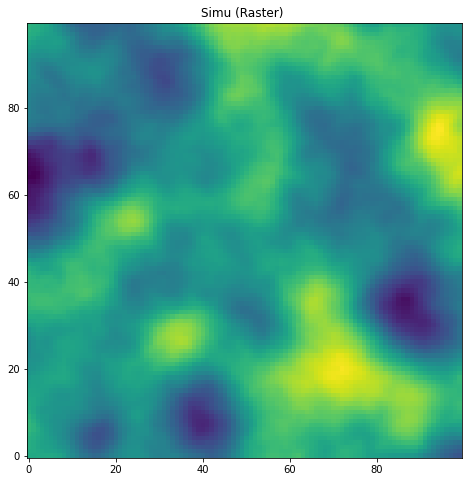

In [5]:
ax = grid.plot()
plt.show()

If you obtain a nice looking image corresponding to the simulation result on the grid ... the installation of gstlearn is successfull. Here is the description of your grid database content:

In [6]:
grid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 4
Total number of samples      = 10000

Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :      1.000     1.000
Number :        100       100

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = Simu - Locator = z1
 